In [1]:
#import
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('images/main/c.jpg', 0)

In [3]:
def show_img_cv(img_title, img):
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
#show_img_cv('original image', img)

In [5]:
def show_img_plt(img, c_map='gray',fig_hight=8, fig_width=6 ):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map)

True

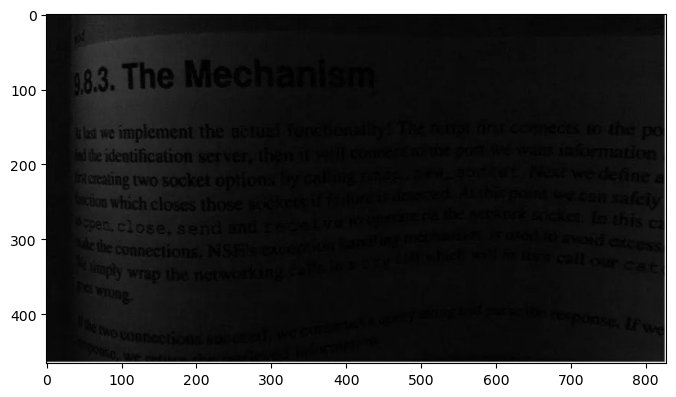

In [6]:
show_img_plt(img)
cv2.imwrite('original_image.jpg', img)

In [7]:
def display_hist_cv(img, channel=0, histsize=256, range=(0, 256)):
    hist_img = cv2.calcHist([img], [channel], None, [histsize], range)
    plt.figure(figsize=(4, 2), dpi=100)
    plt.plot(hist_img)
    plt.show()

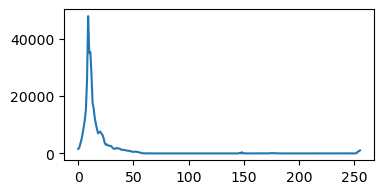

In [8]:
display_hist_cv(img)

In [9]:
def display_hist_plt(img, bins=256, range=(0, 256)):
    plt.figure(figsize=(4, 2), dpi=100)
    plt.hist(img.flat, bins=bins, range=range)
    plt.show()

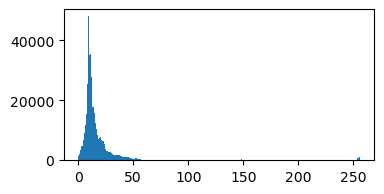

In [10]:
display_hist_plt(img)

## Contrast Stretching

In [11]:
min_new = 0
max_new = 255

min_old = np.min(img)
max_old = np.max(img)

cs_img = np.uint8(((img - min_old)/(max_old - min_old))*(max_new - min_new) + min_new)

#cs = ((I - Imin)/(Imax - Imin))*(max - min) + min

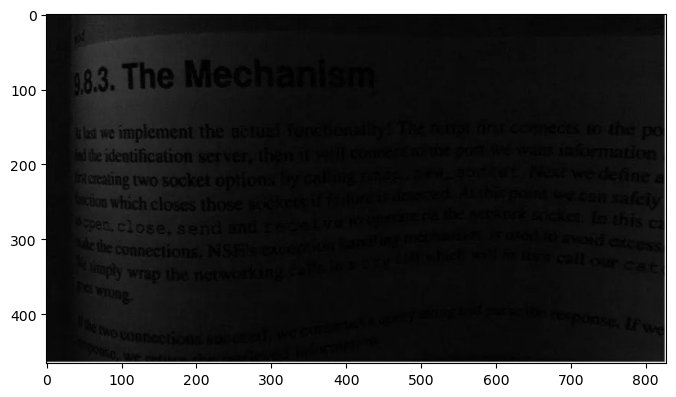

In [12]:
show_img_plt(cs_img)

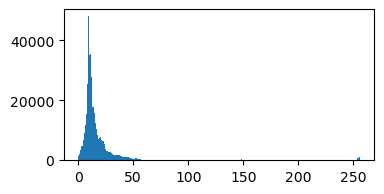

In [13]:
display_hist_plt(cs_img)

## Histogram Equalization

In [14]:
hisequ_img = cv2.equalizeHist(img)

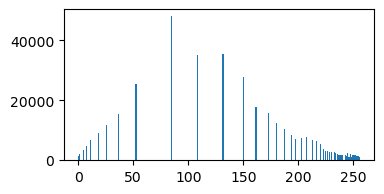

In [15]:
display_hist_plt(hisequ_img)

True

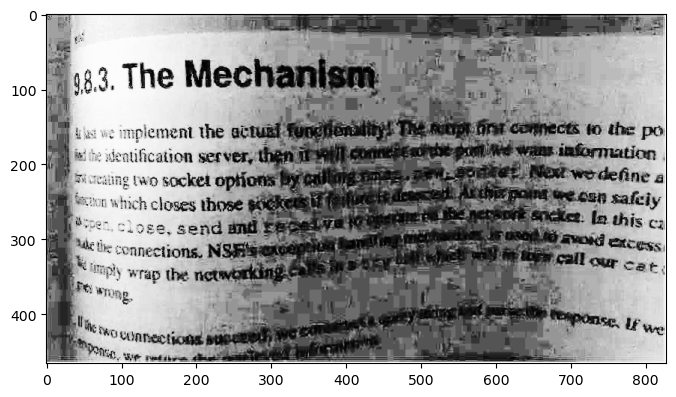

In [16]:
show_img_plt(hisequ_img)
cv2.imwrite('corrected_image.jpg', hisequ_img)

## Gamma

In [17]:
gamma = 0.4
gamma_img = np.uint8(((img/255)**gamma)*255)

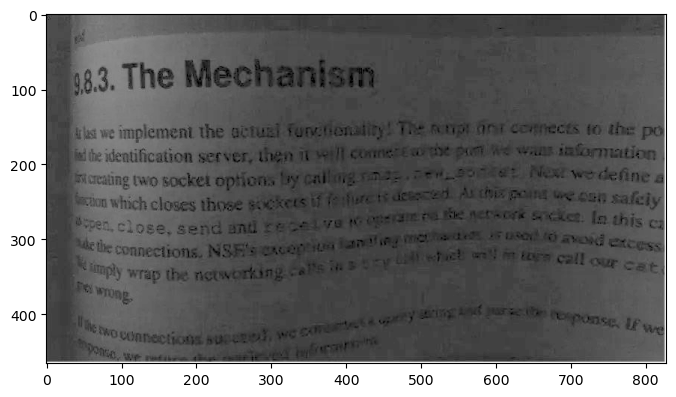

In [18]:
show_img_plt(gamma_img)

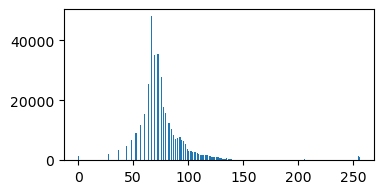

In [19]:
display_hist_plt(gamma_img)

In [20]:
test_heq = cv2.equalizeHist(gamma_img)

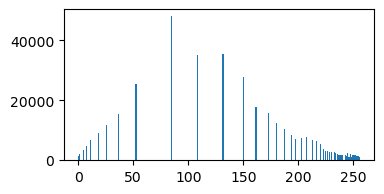

In [21]:
display_hist_plt(test_heq)

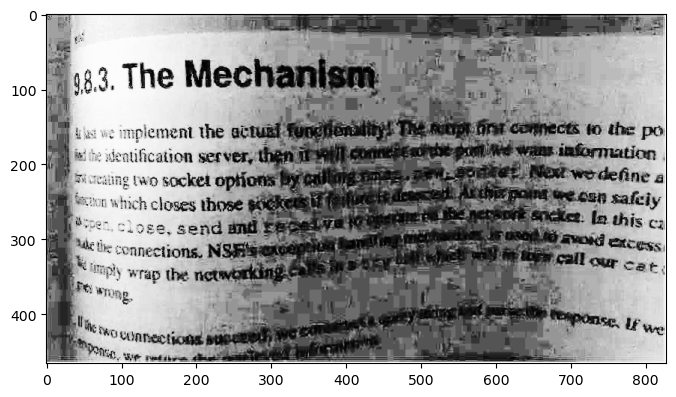

In [22]:
show_img_plt(test_heq)

## Binary Image

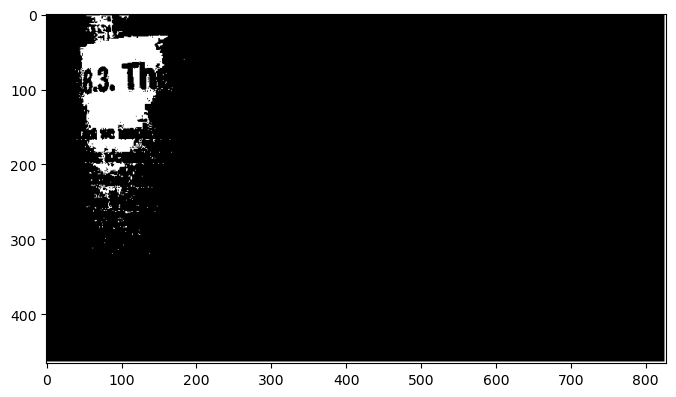

In [23]:
r, thresh = cv2.threshold(img, 40, 255, 0)
show_img_plt(thresh)

## Alpha Channel

In [24]:
img_png = cv2.imread('images/png/diamond.png', -1)
img_png.shape #RGBA

(1735, 2000, 4)

In [25]:
img_png_2 = cv2.cvtColor(img_png, cv2.COLOR_BGRA2RGBA)

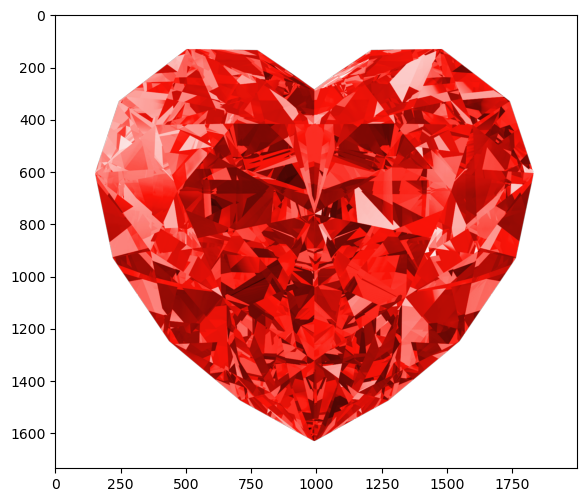

In [26]:
show_img_plt(img_png_2)

In [27]:
r, g, b, a = cv2.split(img_png_2)

In [28]:
a #transparent channel

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
#Color image  ---> COLOR 2 GRAY! -- Histogram --- contrast enhancement! ---??? Gray 2 Color??
#Color image ----> RGB 2 LAB! ---> L! ---> HISTOGRAM, --- LAB2RGB 

In [30]:
#Color image ---> split! --- > contrast enhanacement for each layer ---> merge layers!

In [31]:
cv2.imwrite('filename.jpg', img)

True

In [32]:
# original image! ----> corrected image (enhanced image)

In [33]:
img_jpg = cv2.imread('images/jpg/a.jpg', -1)
img_jpg_2 = cv2.cvtColor(img_jpg, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(img_jpg_2)

In [34]:
l

array([[198, 197, 198, ..., 174, 174, 174],
       [198, 196, 198, ..., 174, 174, 174],
       [197, 197, 198, ..., 174, 174, 174],
       ...,
       [223, 224, 224, ..., 116, 112, 112],
       [223, 223, 224, ..., 115, 113, 112],
       [223, 223, 222, ..., 112, 112, 111]], dtype=uint8)

In [35]:
a

array([[127, 127, 126, ..., 121, 121, 121],
       [127, 127, 127, ..., 121, 121, 121],
       [127, 127, 127, ..., 121, 121, 121],
       ...,
       [126, 126, 125, ..., 168, 168, 168],
       [126, 126, 125, ..., 169, 168, 167],
       [126, 126, 126, ..., 169, 168, 168]], dtype=uint8)

In [36]:
b

array([[112, 112, 111, ...,  95,  95,  95],
       [112, 112, 111, ...,  95,  95,  95],
       [112, 112, 111, ...,  95,  95,  95],
       ...,
       [137, 137, 137, ..., 118, 119, 119],
       [137, 137, 137, ..., 118, 118, 119],
       [137, 137, 137, ..., 117, 118, 119]], dtype=uint8)